# Exercício Eleições

Nesta atividade utilizei os dados eferentes as eleições municipais de 2020 disponibilizados pelo TSE para criar um modelo de previsão se um determinado candiato será eleito ou não baseado em suas características. Usei alguns dos campos do dataset para a previsão, fiz sobre a cidade de Campos dos Goytacazes, mais especifícamente para o cargo de vereador.
Aproveitei os conhecimentos usados em outros exercícios que também estão presentes nesse repostório para criar a versão final deste modelo.

In [ ]:
# Imports
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
candidatos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Eleicao/Gabriel de Oliveira Castro - consulta_cand_2020_RJ.csv',sep=';',encoding = "ISO-8859-1")
receitas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Eleicao/Gabriel de Oliveira Castro - receitas_candidatos_2020_RJ.csv',sep=';',encoding = "ISO-8859-1")
despesas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Eleicao/Gabriel de Oliveira Castro - despesas_contratadas_candidatos_2020_RJ.csv',sep=';',encoding = "ISO-8859-1")


In [ ]:
candidatos.info()

In [ ]:
receitas.info()

In [ ]:
despesas.info()

In [ ]:
candidatos.columns

Index(['SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO', 'NR_CANDIDATO',
       'NM_CANDIDATO', 'NM_URNA_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'DS_COMPOSICAO_COLIGACAO', 'CD_NACIONALIDADE', 'NR_IDADE_DATA_POSSE',
       'DS_GENERO', 'DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA',
       'DS_OCUPACAO', 'VR_DESPESA_MAX_CAMPANHA', 'DS_SIT_TOT_TURNO',
       'ST_REELEICAO', 'ST_DECLARAR_BENS', 'NR_PROTOCOLO_CANDIDATURA',
       'NR_PROCESSO', 'CD_SITUACAO_CANDIDATO_PLEITO',
       'DS_SITUACAO_CANDIDATO_PLEITO', 'CD_SITUACAO_CANDIDATO_URNA',
       'DS_SITUACAO_CANDIDATO_URNA', 'ST_CANDIDATO_INSERIDO_URNA'],
      dtype='object')

In [ ]:
#deletar colunas
candidatos.drop(['NM_URNA_CANDIDATO', 'SG_PARTIDO', 'VR_DESPESA_MAX_CAMPANHA', 
                 'ST_REELEICAO', 'ST_DECLARAR_BENS', 'NR_PROTOCOLO_CANDIDATURA',
                 'NR_PROCESSO', 'CD_SITUACAO_CANDIDATO_PLEITO', 
                 'DS_SITUACAO_CANDIDATO_PLEITO', 'CD_SITUACAO_CANDIDATO_URNA',
                 'DS_SITUACAO_CANDIDATO_URNA', 'ST_CANDIDATO_INSERIDO_URNA'],
                 axis=1, inplace=True)

In [ ]:
candidatos.columns

Index(['SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO', 'NR_CANDIDATO',
       'NM_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'NM_PARTIDO', 'DS_COMPOSICAO_COLIGACAO',
       'CD_NACIONALIDADE', 'NR_IDADE_DATA_POSSE', 'DS_GENERO',
       'DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'DS_OCUPACAO',
       'DS_SIT_TOT_TURNO'],
      dtype='object')

In [ ]:

cargo = candidatos["CD_CARGO"] 
municipio = candidatos["SG_UE"] 


In [ ]:
# Canditados de Campos 

df_canditado_mun = candidatos[candidatos.SG_UE.eq(58190)]

df_canditado_mun

In [ ]:
# receitas de Canditados de Campos
df_receita_mun = receitas[receitas.SG_UE.eq(58190)]
df_receita_mun

In [ ]:
# Despess de Canditados de Campos
df_despesa_mun = despesas[despesas.SG_UE.eq(58190)]
df_despesa_mun

### Determinar o valor total que cada Candidato possui de receita e despesa contratada

In [ ]:
df_receita_mun['VR_RECEITA'] = df_receita_mun['VR_RECEITA'].apply(lambda x: float(x.split()[0].replace(',', '.')))
df_despesa_mun['VR_DESPESA_CONTRATADA'] = df_despesa_mun['VR_DESPESA_CONTRATADA'].apply(lambda x: float(x.split()[0].replace(',', '.')))

In [ ]:
# total receita por candidato

soma_cand_receita = df_receita_mun.groupby('NR_CPF_CANDIDATO')['VR_RECEITA'].sum()
soma_cand_receita


In [ ]:
#total despesa por Candidato
soma_cand_despesa = df_despesa_mun.groupby('NR_CPF_CANDIDATO')['VR_DESPESA_CONTRATADA'].sum()
soma_cand_despesa

In [ ]:
df_canditado_campos = df_canditado_mun[candidatos.CD_CARGO.eq(13)]
df_soma_campos = pd.merge(soma_cand_despesa, soma_cand_receita, how='outer', on='NR_CPF_CANDIDATO')
df_candidato_campos = pd.merge(df_canditado_campos, df_soma_campos, how='left', on='NR_CPF_CANDIDATO')
df_candidato_campos


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,SG_UE,NM_UE,CD_CARGO,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,TP_AGREMIACAO,NR_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,VR_DESPESA_CONTRATADA,VR_RECEITA
0,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,55025,FRANÇOISE DA SILVA CIAFRINO,7072909702,ADVOCACIAELEITORAL2020@HOTMAIL.COM,PARTIDO ISOLADO,55,PARTIDO SOCIAL DEMOCRÁTICO,PSD,1,55,FEMININO,ENSINO MÉDIO COMPLETO,VIÚVO(A),BRANCA,DONA DE CASA,SUPLENTE,10000.0,11701.38
1,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,70111,JOSÉ ARMANDO GOMES PIMENTA,709211724,AVANTEMUNICIPIOCAMPOS@GMAILCOM,PARTIDO ISOLADO,70,AVANTE,AVANTE,1,51,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),PRETA,OUTROS,SUPLENTE,NaN,1179.70
2,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,12555,JOSE CARLOS DIAS DA SILVA,99061929768,ELEICAOCAMPOS2020@GMAIL.COM,PARTIDO ISOLADO,12,PARTIDO DEMOCRÁTICO TRABALHISTA,PDT,1,56,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,DIVORCIADO(A),BRANCA,COMERCIANTE,SUPLENTE,NaN,8246.85
3,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,18777,FREDERICO HENRIQUE GONÇALVES,9034045757,FRED.CARMEM@GMAIL.COM,PARTIDO ISOLADO,18,REDE SUSTENTABILIDADE,REDE,1,39,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,SERVIDOR PÚBLICO MUNICIPAL,NÃO ELEITO,200.0,700.00
4,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,51999,EDIVALDO VIEIRA DE AZEVEDO,1768302782,ELEICAOCAMPOS2020@GMAIL.COM,PARTIDO ISOLADO,51,PATRIOTA,PATRIOTA,1,49,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,FISIOTERAPEUTA E TERAPEUTA OCUPACIONAL,NÃO ELEITO,NaN,4761.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,27789,EDSON DOS SANTOS FARIA,83836187787,ELEICAOCAMPOS2020@GMAIL.COM,PARTIDO ISOLADO,27,DEMOCRACIA CRISTÃ,DC,1,55,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,POLICIAL MILITAR,NÃO ELEITO,325.5,5716.85
814,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,22789,RONALD CAMPOS MANHAES,86648829753,ELEICAOCAMPOS2020@GMAIL.COM,PARTIDO ISOLADO,22,PARTIDO LIBERAL,PL,1,55,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,SUPLENTE,1300.0,6461.85
815,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,40369,CÁTIA MARIA DE OLIVEIRA DE MELLO,7899316723,CATIAMELLONUTRI@GMAIL.COM,PARTIDO ISOLADO,40,PARTIDO SOCIALISTA BRASILEIRO,PSB,1,43,FEMININO,SUPERIOR COMPLETO,CASADO(A),PARDA,NUTRICIONISTA E ASSEMELHADOS,NÃO ELEITO,NaN,1387.04
816,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,33000,ZACARIAS TEIXEIRA PEREIRA,99058987787,PMN33CAMPOS@OUTLOOK.COM,PARTIDO ISOLADO,33,PARTIDO DA MOBILIZAÇÃO NACIONAL,PMN,1,53,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,SOLTEIRO(A),BRANCA,OUTROS,NÃO ELEITO,NaN,187.50


In [ ]:
df_candidato_campos.info()


In [ ]:
compression_opts = dict(method='zip',
                        archive_name='Eleicao-GabrielCastro.csv')  
df_candidato_campos.to_csv('Eleicao-GabrielCastro.zip', index=False,
          compression=compression_opts)

In [ ]:
df_candidato_campos.DS_SIT_TOT_TURNO.unique()
juntar = ['ELEITO POR QP', 'ELEITO POR MÉDIA']
df_candidato_campos.loc[df_candidato_campos.DS_SIT_TOT_TURNO.isin(juntar), 'DS_SIT_TOT_TURNO'] = 'ELEITO'
excluir = ['#NULO#']
df_candidato_campos.loc[df_candidato_campos.DS_SIT_TOT_TURNO.isin(excluir), 'DS_SIT_TOT_TURNO'] = 'NÃO ELEITO'
df_candidato_campos.DS_SIT_TOT_TURNO.unique()

array(['SUPLENTE', 'NÃO ELEITO', 'ELEITO'], dtype=object)

In [ ]:
df_candidato_campos.isnull()

,SG_UE,NM_UE,CD_CARGO,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,TP_AGREMIACAO,NR_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,VR_DESPESA_CONTRATADA,VR_RECEITA
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
814,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
815,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
816,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [ ]:
df_candidato_campos.isnull().sum()

SG_UE                        0
NM_UE                        0
CD_CARGO                     0
DS_CARGO                     0
NR_CANDIDATO                 0
NM_CANDIDATO                 0
NR_CPF_CANDIDATO             0
NM_EMAIL                     0
TP_AGREMIACAO                0
NR_PARTIDO                   0
NM_PARTIDO                   0
DS_COMPOSICAO_COLIGACAO      0
CD_NACIONALIDADE             0
NR_IDADE_DATA_POSSE          0
DS_GENERO                    0
DS_GRAU_INSTRUCAO            0
DS_ESTADO_CIVIL              0
DS_COR_RACA                  0
DS_OCUPACAO                  0
DS_SIT_TOT_TURNO             0
VR_DESPESA_CONTRATADA      481
VR_RECEITA                  26
dtype: int64

In [ ]:
#df_candidato_campos
df_candidato_campos.loc[pd.isnull(df_candidato_campos['VR_DESPESA_CONTRATADA'])]

In [ ]:
#df_candidato_campos
df_candidato_campos['VR_DESPESA_CONTRATADA'].fillna(df_candidato_campos['VR_DESPESA_CONTRATADA'].mean(), inplace = True)

In [ ]:
#df_candidato_campos
df_candidato_campos[pd.isnull(df_candidato_campos['VR_DESPESA_CONTRATADA'])]

,SG_UE,NM_UE,CD_CARGO,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,TP_AGREMIACAO,NR_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,VR_DESPESA_CONTRATADA,VR_RECEITA


In [ ]:
#df_candidato_campos
df_candidato_campos.loc[pd.isnull(df_candidato_campos['VR_RECEITA'])]

In [ ]:
#df_candidato_campos
df_candidato_campos['VR_DESPESA_CONTRATADA'].fillna(df_candidato_campos['VR_DESPESA_CONTRATADA'].mean(), inplace = True)

In [ ]:
#df_candidato_campos
df_candidato_campos[pd.isnull(df_candidato_campos['VR_DESPESA_CONTRATADA'])]

,SG_UE,NM_UE,CD_CARGO,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,TP_AGREMIACAO,NR_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,VR_DESPESA_CONTRATADA,VR_RECEITA


In [ ]:
df_candidato_campos

,SG_UE,NM_UE,CD_CARGO,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,TP_AGREMIACAO,NR_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,VR_DESPESA_CONTRATADA,VR_RECEITA
0,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,55025,FRANÇOISE DA SILVA CIAFRINO,7072909702,ADVOCACIAELEITORAL2020@HOTMAIL.COM,PARTIDO ISOLADO,55,PARTIDO SOCIAL DEMOCRÁTICO,PSD,1,55,FEMININO,ENSINO MÉDIO COMPLETO,VIÚVO(A),BRANCA,DONA DE CASA,SUPLENTE,10000.000000,11701.38
1,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,70111,JOSÉ ARMANDO GOMES PIMENTA,709211724,AVANTEMUNICIPIOCAMPOS@GMAILCOM,PARTIDO ISOLADO,70,AVANTE,AVANTE,1,51,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),PRETA,OUTROS,SUPLENTE,6434.127982,1179.70
2,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,12555,JOSE CARLOS DIAS DA SILVA,99061929768,ELEICAOCAMPOS2020@GMAIL.COM,PARTIDO ISOLADO,12,PARTIDO DEMOCRÁTICO TRABALHISTA,PDT,1,56,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,DIVORCIADO(A),BRANCA,COMERCIANTE,SUPLENTE,6434.127982,8246.85
3,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,18777,FREDERICO HENRIQUE GONÇALVES,9034045757,FRED.CARMEM@GMAIL.COM,PARTIDO ISOLADO,18,REDE SUSTENTABILIDADE,REDE,1,39,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,SERVIDOR PÚBLICO MUNICIPAL,NÃO ELEITO,200.000000,700.00
4,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,51999,EDIVALDO VIEIRA DE AZEVEDO,1768302782,ELEICAOCAMPOS2020@GMAIL.COM,PARTIDO ISOLADO,51,PATRIOTA,PATRIOTA,1,49,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,FISIOTERAPEUTA E TERAPEUTA OCUPACIONAL,NÃO ELEITO,6434.127982,4761.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,27789,EDSON DOS SANTOS FARIA,83836187787,ELEICAOCAMPOS2020@GMAIL.COM,PARTIDO ISOLADO,27,DEMOCRACIA CRISTÃ,DC,1,55,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,POLICIAL MILITAR,NÃO ELEITO,325.500000,5716.85
814,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,22789,RONALD CAMPOS MANHAES,86648829753,ELEICAOCAMPOS2020@GMAIL.COM,PARTIDO ISOLADO,22,PARTIDO LIBERAL,PL,1,55,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,SUPLENTE,1300.000000,6461.85
815,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,40369,CÁTIA MARIA DE OLIVEIRA DE MELLO,7899316723,CATIAMELLONUTRI@GMAIL.COM,PARTIDO ISOLADO,40,PARTIDO SOCIALISTA BRASILEIRO,PSB,1,43,FEMININO,SUPERIOR COMPLETO,CASADO(A),PARDA,NUTRICIONISTA E ASSEMELHADOS,NÃO ELEITO,6434.127982,1387.04
816,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,33000,ZACARIAS TEIXEIRA PEREIRA,99058987787,PMN33CAMPOS@OUTLOOK.COM,PARTIDO ISOLADO,33,PARTIDO DA MOBILIZAÇÃO NACIONAL,PMN,1,53,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,SOLTEIRO(A),BRANCA,OUTROS,NÃO ELEITO,6434.127982,187.50


## Gráficos

### Gráfico por idade.

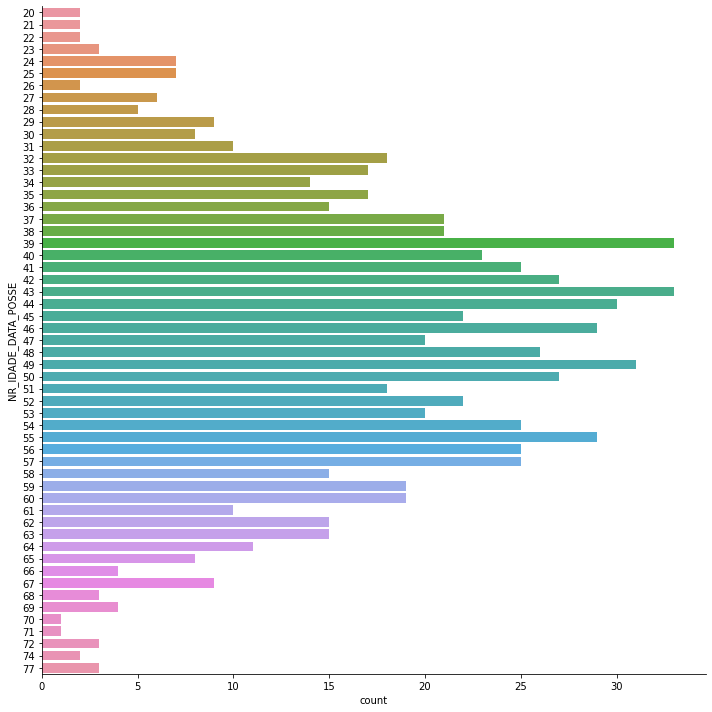

In [ ]:
g = sns.catplot(y="NR_IDADE_DATA_POSSE", kind="count", data=df_candidato_campos, height=10)

### Gráfico por gênero.

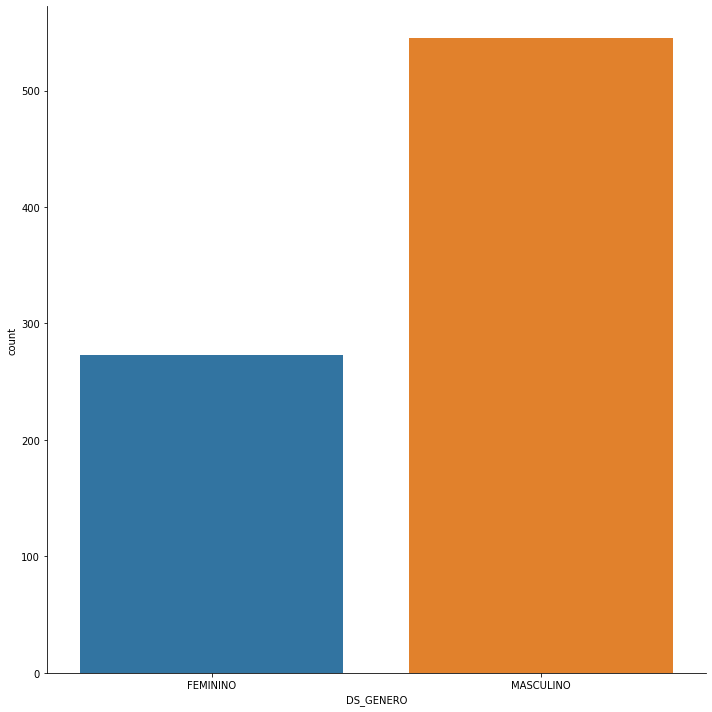

In [ ]:
g = sns.catplot(x="DS_GENERO", kind="count", data=df_candidato_campos, height=10)

### Gráfico de despesas.

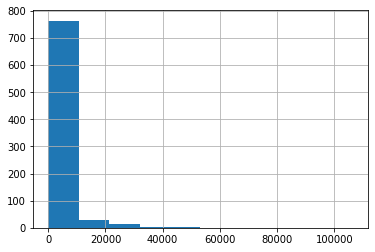

In [ ]:
g = df_candidato_campos.VR_DESPESA_CONTRATADA.hist()

### Gráfico receitas.

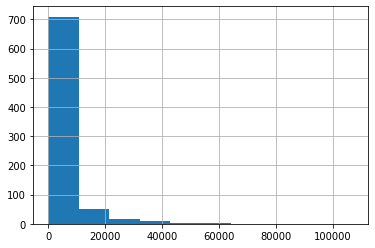

In [ ]:
g = df_candidato_campos.VR_RECEITA.hist()

### Gráfico por estado civil.

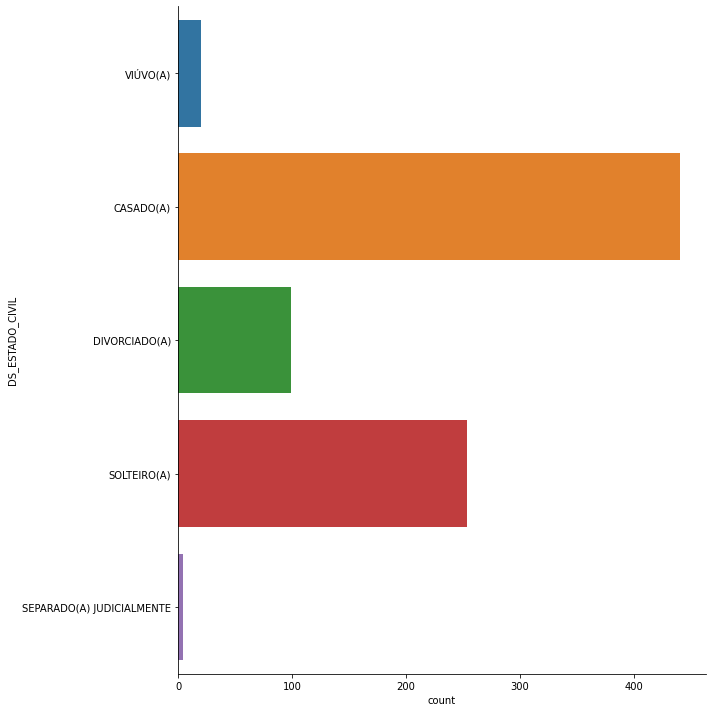

In [ ]:
g = sns.catplot(y="DS_ESTADO_CIVIL", kind="count", data=df_candidato_campos, height=10)

### Gráfico por raça.

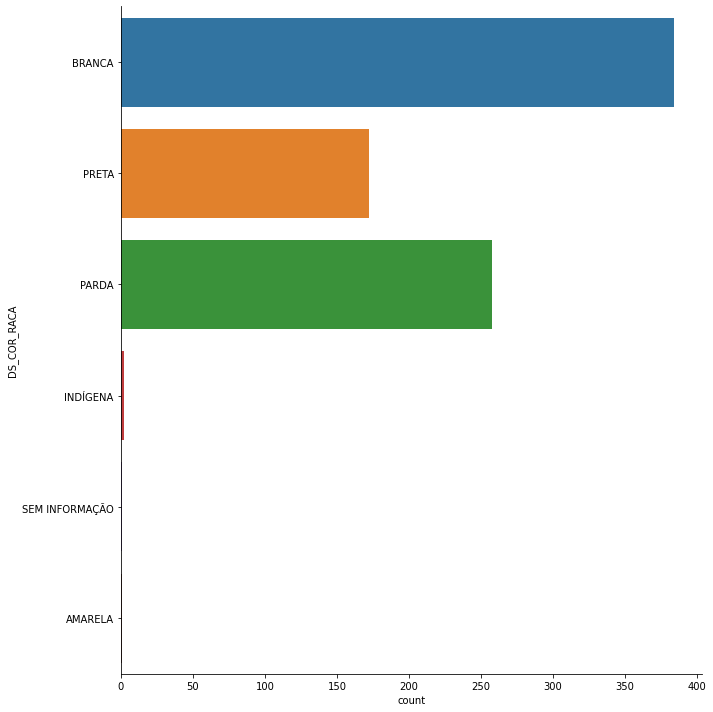

In [ ]:
g = sns.catplot(y="DS_COR_RACA", kind="count", data=df_candidato_campos, height=10)

### Gráfico por ocupação.

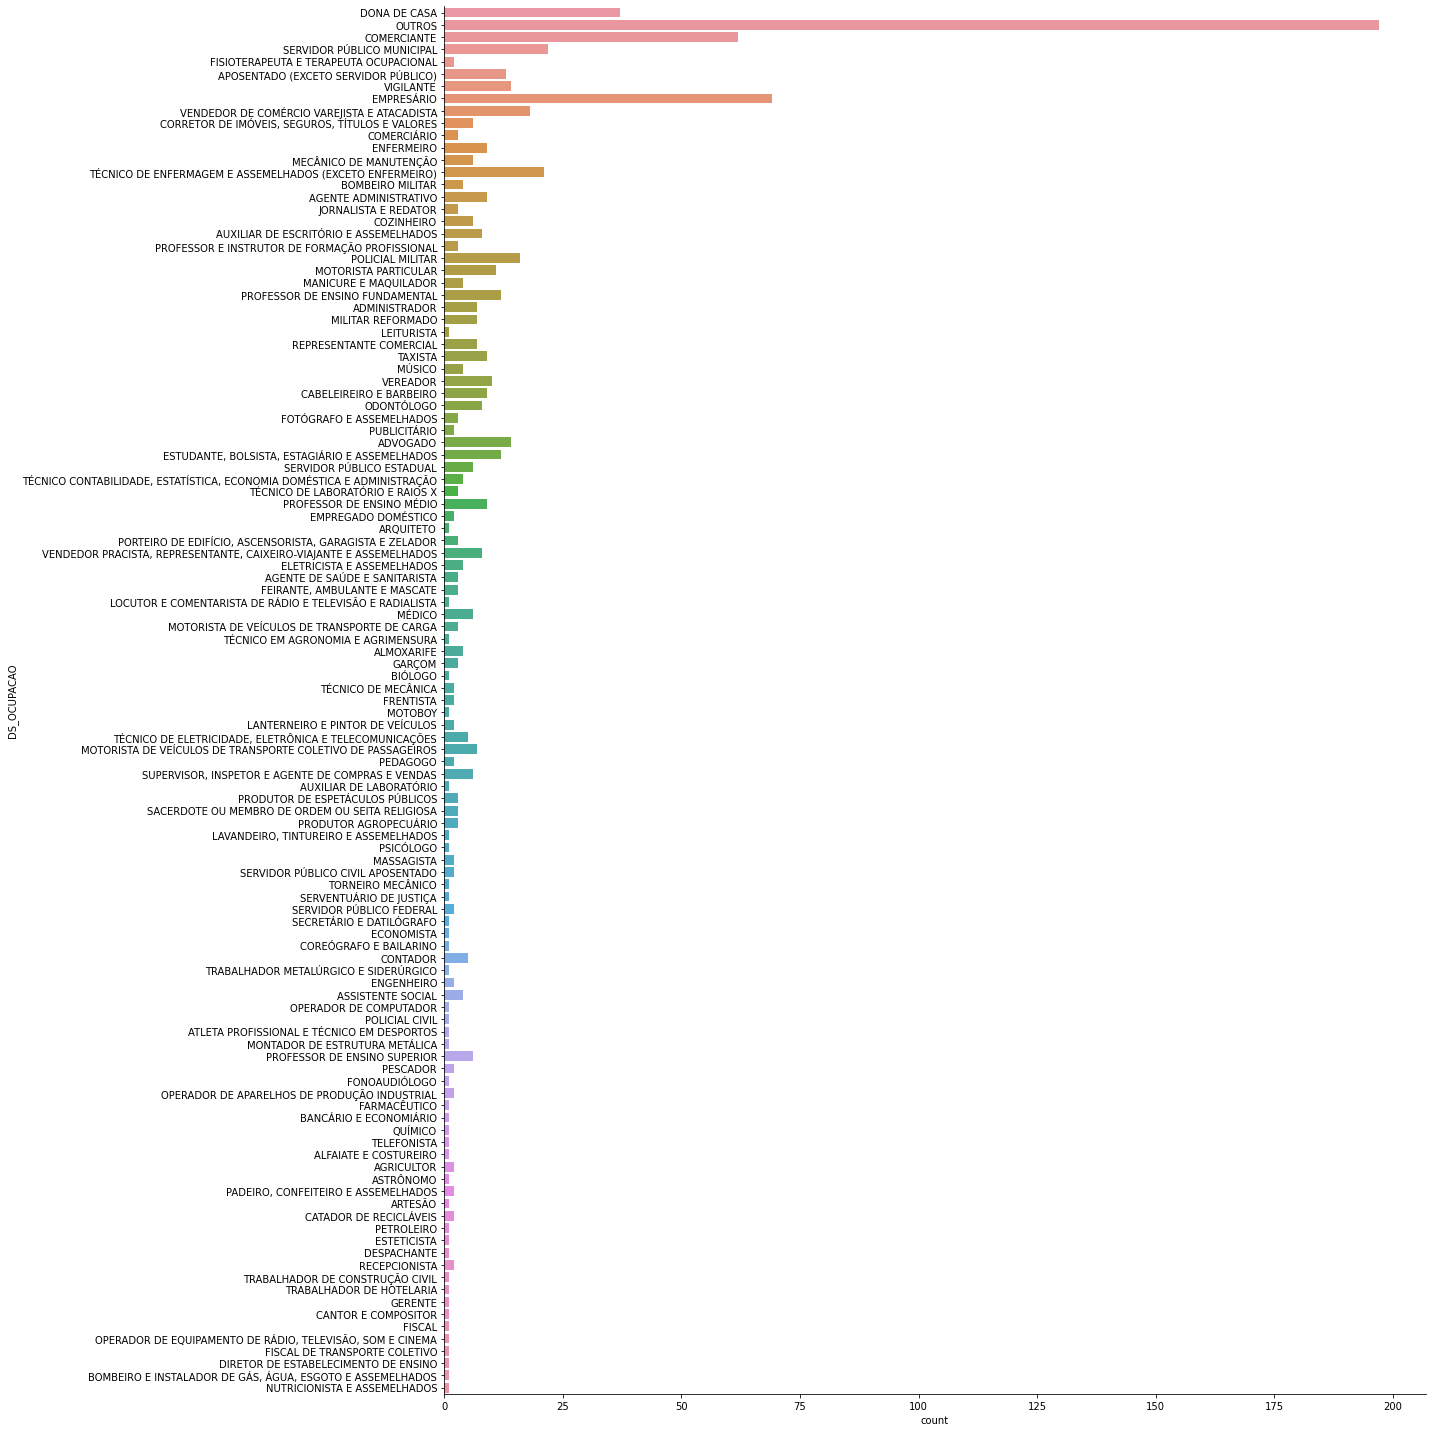

In [ ]:
g = sns.catplot(y="DS_OCUPACAO", kind="count", data=df_candidato_campos, height=20)

### Gráfico por partido.

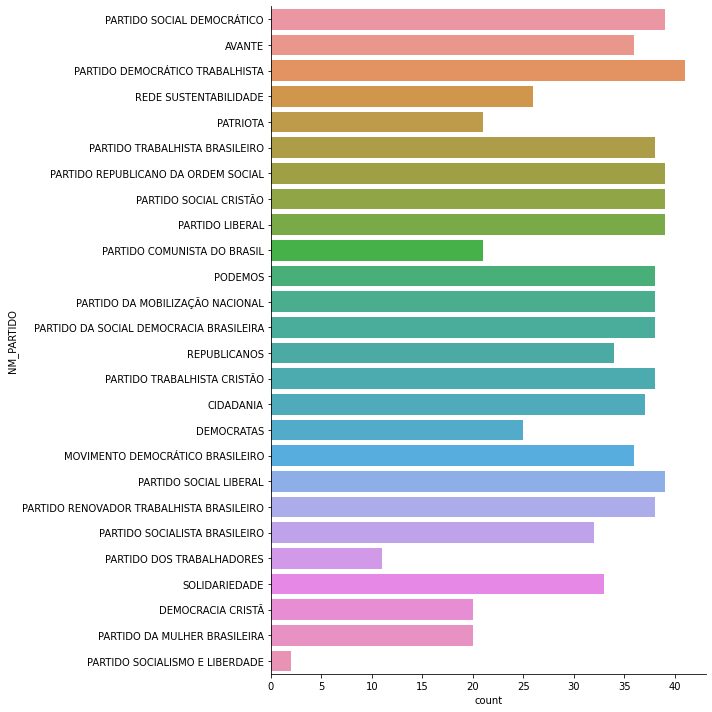

In [ ]:
g = sns.catplot(y="NM_PARTIDO", kind="count", data=df_candidato_campos, height=10)

### Gráfico por escolaridade.

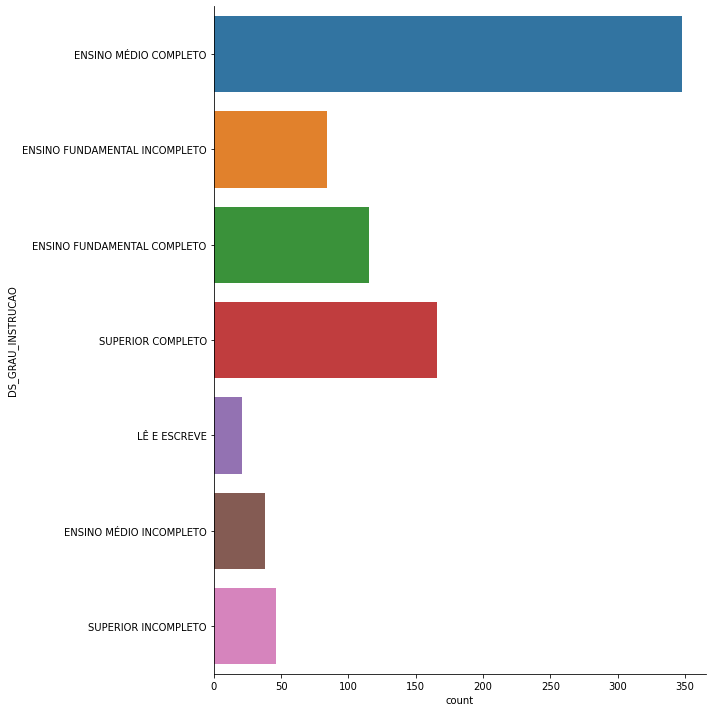

In [ ]:
g = sns.catplot(y="DS_GRAU_INSTRUCAO", kind="count", data=df_candidato_campos, height=10)

In [ ]:
dados_treino = ['NR_IDADE_DATA_POSSE','DS_GENERO','VR_DESPESA_CONTRATADA','VR_RECEITA',
                'DS_ESTADO_CIVIL','DS_COR_RACA','DS_OCUPACAO','NM_PARTIDO','DS_GRAU_INSTRUCAO']

In [ ]:
X= df_candidato_campos[dados_treino]
X

,NR_IDADE_DATA_POSSE,DS_GENERO,VR_DESPESA_CONTRATADA,VR_RECEITA,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,NM_PARTIDO,DS_GRAU_INSTRUCAO
0,55,FEMININO,10000.000000,11701.38,VIÚVO(A),BRANCA,DONA DE CASA,PARTIDO SOCIAL DEMOCRÁTICO,ENSINO MÉDIO COMPLETO
1,51,MASCULINO,6434.127982,1179.70,CASADO(A),PRETA,OUTROS,AVANTE,ENSINO FUNDAMENTAL INCOMPLETO
2,56,MASCULINO,6434.127982,8246.85,DIVORCIADO(A),BRANCA,COMERCIANTE,PARTIDO DEMOCRÁTICO TRABALHISTA,ENSINO FUNDAMENTAL COMPLETO
3,39,MASCULINO,200.000000,700.00,CASADO(A),BRANCA,SERVIDOR PÚBLICO MUNICIPAL,REDE SUSTENTABILIDADE,ENSINO MÉDIO COMPLETO
4,49,MASCULINO,6434.127982,4761.85,DIVORCIADO(A),BRANCA,FISIOTERAPEUTA E TERAPEUTA OCUPACIONAL,PATRIOTA,SUPERIOR COMPLETO
...,...,...,...,...,...,...,...,...,...
813,55,MASCULINO,325.500000,5716.85,CASADO(A),PARDA,POLICIAL MILITAR,DEMOCRACIA CRISTÃ,ENSINO MÉDIO COMPLETO
814,55,MASCULINO,1300.000000,6461.85,CASADO(A),BRANCA,EMPRESÁRIO,PARTIDO LIBERAL,ENSINO FUNDAMENTAL INCOMPLETO
815,43,FEMININO,6434.127982,1387.04,CASADO(A),PARDA,NUTRICIONISTA E ASSEMELHADOS,PARTIDO SOCIALISTA BRASILEIRO,SUPERIOR COMPLETO
816,53,MASCULINO,6434.127982,187.50,SOLTEIRO(A),BRANCA,OUTROS,PARTIDO DA MOBILIZAÇÃO NACIONAL,ENSINO FUNDAMENTAL COMPLETO


In [ ]:
y = df_candidato_campos['DS_SIT_TOT_TURNO']
y

0        SUPLENTE
1        SUPLENTE
2        SUPLENTE
3      NÃO ELEITO
4      NÃO ELEITO
          ...    
813    NÃO ELEITO
814      SUPLENTE
815    NÃO ELEITO
816    NÃO ELEITO
817      SUPLENTE
Name: DS_SIT_TOT_TURNO, Length: 818, dtype: object

In [ ]:
y.shape, X.shape

((818,), (818, 9))

In [ ]:
X.drop(columns=['VR_RECEITA','VR_DESPESA_CONTRATADA'])

,NR_IDADE_DATA_POSSE,DS_GENERO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,NM_PARTIDO,DS_GRAU_INSTRUCAO
0,55,0,0,0,0,0,0
1,51,1,1,1,1,1,1
2,56,1,2,0,2,2,2
3,39,1,1,0,3,3,0
4,49,1,2,0,4,4,3
...,...,...,...,...,...,...,...
813,55,1,1,2,20,23,0
814,55,1,1,0,7,8,1
815,43,0,1,2,112,20,3
816,53,1,3,0,1,11,2


### Treinando o modelo.

In [ ]:
x = X
x['DS_COR_RACA']

0      0
1      1
2      0
3      0
4      0
      ..
813    2
814    0
815    2
816    0
817    0
Name: DS_COR_RACA, Length: 818, dtype: int64

In [ ]:
dfs = y
dfs1 = x['DS_COR_RACA']
dfs2 = x['DS_ESTADO_CIVIL']
dfs3 = x['DS_OCUPACAO']
dfs4 = x['DS_GENERO']
dfs5 = x['NM_PARTIDO']
dfs6 = x['DS_GRAU_INSTRUCAO']


gen = dfs.unique()
gen1 = dfs1.unique()
gen2 = dfs2.unique()
gen3 = dfs3.unique()
gen4 = dfs4.unique()
gen5 = dfs5.unique()
gen6 = dfs6.unique()

gen

array([0, 1, 2])

In [ ]:
gen_i = {k:v for v, k in enumerate(gen)}
gen_i1 = {k:v for v, k in enumerate(gen1)}
gen_i2 = {k:v for v, k in enumerate(gen2)}
gen_i3 = {k:v for v, k in enumerate(gen3)}
gen_i4 = {k:v for v, k in enumerate(gen4)}
gen_i5 = {k:v for v, k in enumerate(gen5)}
gen_i6 = {k:v for v, k in enumerate(gen6)}

gen_i

{0: 0, 1: 1, 2: 2}

In [ ]:
dfs = dfs.apply(lambda x : gen_i[x])
dfs1 = dfs1.apply(lambda x : gen_i1[x])
dfs2 = dfs2.apply(lambda x : gen_i2[x])
dfs3 = dfs3.apply(lambda x : gen_i3[x])
dfs4 = dfs4.apply(lambda x : gen_i4[x])
dfs5 = dfs5.apply(lambda x : gen_i5[x])
dfs6 = dfs6.apply(lambda x : gen_i6[x])

dfs

0      0
1      0
2      0
3      1
4      1
      ..
813    1
814    0
815    1
816    1
817    0
Name: DS_SIT_TOT_TURNO, Length: 818, dtype: int64

In [ ]:
x['DS_COR_RACA'] = dfs1
x['DS_ESTADO_CIVIL'] = dfs2
x['DS_OCUPACAO'] = dfs3
x['DS_GENERO'] = dfs4
x['NM_PARTIDO'] = dfs5
x['DS_GRAU_INSTRUCAO'] = dfs6
y= dfs
y

In [ ]:
min_max_scaler =MinMaxScaler()

In [ ]:
X_scaled = x.copy()
X_scaled[X_scaled.columns] = min_max_scaler.fit_transform(X_scaled[X_scaled.columns])
X_scaled

,NR_IDADE_DATA_POSSE,DS_GENERO,VR_DESPESA_CONTRATADA,VR_RECEITA,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,NM_PARTIDO,DS_GRAU_INSTRUCAO
0,0.614035,0.0,0.093873,0.109056,0.00,0.0,0.000000,0.00,0.000000
1,0.543860,1.0,0.060369,0.010701,0.25,0.2,0.008929,0.04,0.166667
2,0.631579,1.0,0.060369,0.076764,0.50,0.0,0.017857,0.08,0.333333
3,0.333333,1.0,0.001795,0.006217,0.25,0.0,0.026786,0.12,0.000000
4,0.508772,1.0,0.060369,0.044186,0.50,0.0,0.035714,0.16,0.500000
...,...,...,...,...,...,...,...,...,...
813,0.614035,1.0,0.002974,0.053114,0.25,0.4,0.178571,0.92,0.000000
814,0.614035,1.0,0.012130,0.060078,0.25,0.0,0.062500,0.32,0.166667
815,0.403509,0.0,0.060369,0.012639,0.25,0.4,1.000000,0.80,0.500000
816,0.578947,1.0,0.060369,0.001426,0.75,0.0,0.008929,0.44,0.333333


In [ ]:
reshape_map =[
   [1, 0, 0],
   [0, 1, 0],
   [0, 0, 1],
]

y_reshaped = y.copy().apply(lambda x: reshape_map[x])
y_reshaped.shape

flat = [y for x in y_reshaped for y in x]

In [ ]:
the_y = np.asarray(flat).reshape((-1,3))
the_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0]])

In [ ]:
the_x = np.array(X_scaled, dtype = 'float32')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(the_x,the_y, test_size=0.3)

In [ ]:
checkpoint_dir = './salvar_treino_final_final'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_{epoch}')
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath= checkpoint_prefix, save_weights_only=True)

In [ ]:
def build_model():
    model = Sequential()

    model.add(Dense(256, activation ='relu', input_shape=(9,)))
    model.add(Dropout(.2))
    model.add(Dense(16))
    model.add(Dense(3,activation='softmax'))

    return model

In [ ]:
model = build_model()
model.compile(
    loss='mse',
    optimizer= 'adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 256)               2560      
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 16)                4112      
                                                                 
 dense_23 (Dense)            (None, 3)                 51        
                                                                 
Total params: 6,723
Trainable params: 6,723
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs = 500, callbacks=[checkpoint_callback])

In [ ]:
evaluation = model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.6098


In [ ]:
evaluation

[nan, 0.6097561120986938]

In [ ]:
predicted = model.predict(x_test)
predicted

predicted_norm = np.argmax(np.array(predicted), axis=1)
predicted_norm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [ ]:
expected = np.argmax(y_test, axis=1)
expected

array([0, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       2, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1])

In [ ]:
print (classification_report(expected,predicted_norm))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       150
           1       0.00      0.00      0.00        89
           2       0.00      0.00      0.00         7

    accuracy                           0.61       246
   macro avg       0.20      0.33      0.25       246
weighted avg       0.37      0.61      0.46       246



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
